![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/logo_MCV_W.png)

# **Perspective Transforms**

####**In this lesson we'll learn:**
1. Use OpenCV's getPerspectiveTransform
2. Use findContours to get corners and automate perspective Transform


In [1]:
# Making root folder as working directory
import os
from pathlib import Path
os.chdir("D:\\Learning\\udemy_computer_vision_course")

# checking current workig dirtectory path
print(os.getcwd())

ROOT = Path(".")

D:\Learning\udemy_computer_vision_course


In [4]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 5):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()
    
# # Download and unzip our images 
# !wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip

# !unzip -qq images.zip

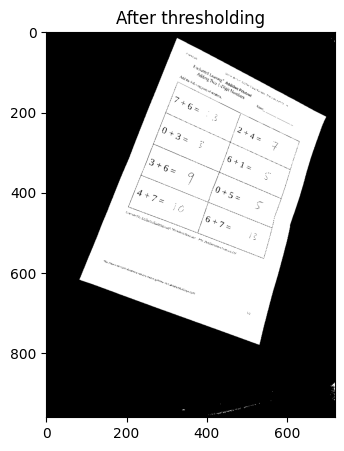

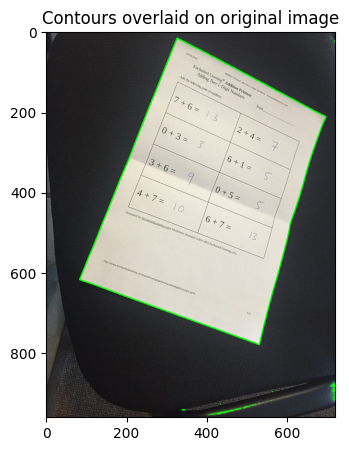

Number of Contours found = 54


In [5]:
image = cv2.imread('data/images/scan.jpg')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))

### **Approxiamte our contour above to just 4 points using approxPolyDP**

In [6]:
# Sort contours large to small by area

sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

# loop over the contours
for cnt in sorted_contours:
	# approximate the contour
	perimeter = cv2.arcLength(cnt, True)
	approx = cv2.approxPolyDP(cnt, 0.05 * perimeter, True)
 
	if len(approx) == 4:
		break

# Our x, y cordinates of the four corners 
print("Our 4 corner points are:")
print(approx)

Our 4 corner points are:
[[[326  15]]

 [[ 83 617]]

 [[531 779]]

 [[697 211]]]


### **Use getPerspectiveTransform and warpPerspective to create our top down view**

Note: We mannauly matched the order of the points

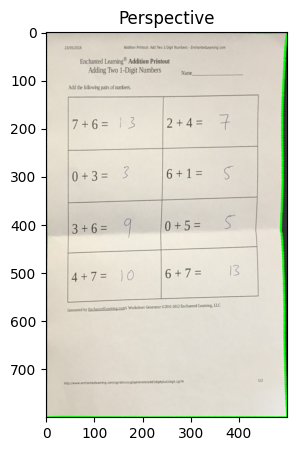

In [7]:
# Order obtained here is top left, bottom left, bottom right, top right
inputPts = np.float32(approx)

outputPts = np.float32([[0,0],
                       [0,800],
                       [500,800],
                       [500,0]])

# Get our Transform Matrix, M
M = cv2.getPerspectiveTransform(inputPts,outputPts)

# Apply the transform Matrix M using Warp Perspective
dst = cv2.warpPerspective(image, M, (500,800))

imshow("Perspective", dst)

### **Excercise**

1. Order points in ```approx``` sorting from top left going clockwise (i.e. top left, top right, bottom left, bottom right)
2. Get initial contour aspect ratio and adjust final Warp to output in that aspect ratio and orientation

In [8]:
approx

array([[[326,  15]],

       [[ 83, 617]],

       [[531, 779]],

       [[697, 211]]], dtype=int32)

In [9]:
import numpy as np

# Given array of corner points
corner_points = np.array([[[326, 15]],
                         [[83, 617]],
                         [[531, 779]],
                         [[697, 211]]], dtype=np.int32)

# Flatten the array to get a 1D array of points
flat_points = corner_points.reshape(-1, 2)

# Calculate the centroid of the points
centroid = flat_points.mean(axis=0)

# Calculate the angles of each point with respect to the centroid
angles = np.arctan2(flat_points[:, 1] - centroid[1], flat_points[:, 0] - centroid[0])

# Sort the points based on angles
sorted_indices = np.argsort(angles)

# Arrange the points in clockwise order
clockwise_points = flat_points[sorted_indices]

# Reshape the array to the original shape
clockwise_points = clockwise_points.reshape(corner_points.shape)

# Print the result
print(clockwise_points)

[[[326  15]]

 [[697 211]]

 [[531 779]]

 [[ 83 617]]]
